In [1]:
%matplotlib notebook

In [2]:
import psycopg2

In [3]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt


In [4]:
import os

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = os.getenv("ENV_ADDRESS")  ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = os.getenv("ENV_PORT") 
POSTGRES_USERNAME = os.getenv("ENV_USERNAME")  ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = os.getenv("ENV_PASSWORD") ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD POSTGRES_DBNAME = 'database' ## CHANGE THIS TO YOUR DATABASE NAME
POSTGRES_DBNAME = 'Employee_SQL_V3'
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME,
                        password=POSTGRES_PASSWORD,
                        ipaddress=POSTGRES_ADDRESS,
                        port=POSTGRES_PORT,
                        dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)


In [7]:
Salaries = pd.read_sql_query('''SELECT * FROM salaries;''',cnx)

In [8]:
Salaries

,emp_id,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


<IPython.core.display.Javascript object>


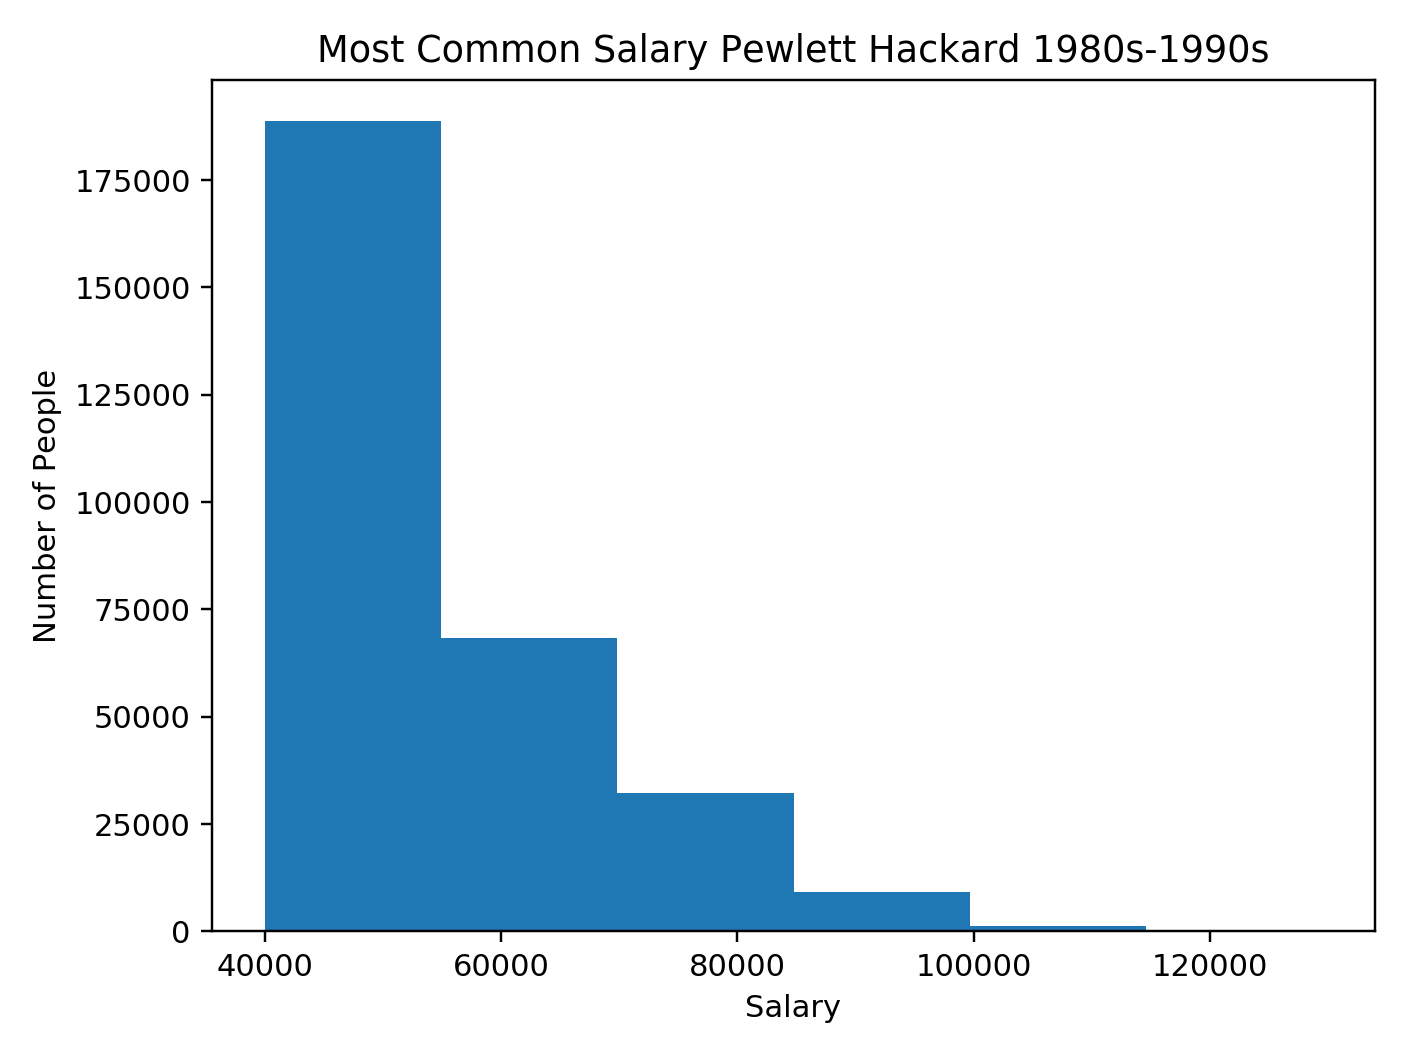

(array([1.88804e+05, 6.84360e+04, 3.22580e+04, 9.17200e+03, 1.26100e+03,
        9.30000e+01]),
 array([ 40000.        ,  54915.33333333,  69830.66666667,  84746.        ,
         99661.33333333, 114576.66666667, 129492.        ]),
 <a list of 6 Patch objects>)

In [9]:
plt.hist(Salaries["salary"], bins=6)

In [16]:
plt.title("Most Common Salary Pewlett Hackard 1980s-1990s")
plt.xlabel("Salary")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()

In [17]:
plt.savefig('most_common_salary.png')

In [16]:
Salaries["salary"].min()

40000

In [18]:
Departments_Employee = pd.read_sql_query('''SELECT * FROM Department_Employee_No''', cnx)

In [19]:
Departments_Employee = Departments_Employee[["emp_id", "dept_no"]]

In [20]:
Departments_Employee

,emp_id,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [21]:
Department_Names = pd.read_sql_query('''SELECT * FROM Departments''', cnx)

In [22]:
Department_Names

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [24]:
merge_df = pd.merge(Salaries, Departments_Employee, on="emp_id")

In [25]:
merge_df.count()

emp_id     331603
salary     331603
dept_no    331603
dtype: int64

In [26]:
merge_df

,emp_id,salary,dept_no
0,10001,60117,d005
1,10002,65828,d007
2,10003,40006,d004
3,10004,40054,d004
4,10005,78228,d003
...,...,...,...
331598,499995,40000,d004
331599,499996,58058,d004
331600,499997,49597,d005
331601,499998,40000,d002


In [27]:
merge_final_df = pd.merge(merge_df, Department_Names, on="dept_no")

In [28]:
merge_final_df

,emp_id,salary,dept_no,dept_name
0,10001,60117,d005,Development
1,10006,40000,d005,Development
2,10008,46671,d005,Development
3,10012,40000,d005,Development
4,10014,46168,d005,Development
...,...,...,...,...
331598,499950,54788,d002,Finance
331599,499975,40000,d002,Finance
331600,499977,70216,d002,Finance
331601,499989,64183,d002,Finance


In [29]:
del merge_final_df["dept_no"]

In [30]:
merge_final_df

,emp_id,salary,dept_name
0,10001,60117,Development
1,10006,40000,Development
2,10008,46671,Development
3,10012,40000,Development
4,10014,46168,Development
...,...,...,...
331598,499950,54788,Finance
331599,499975,40000,Finance
331600,499977,70216,Finance
331601,499989,64183,Finance


In [31]:
average_salary_df = merge_final_df.groupby(['dept_name']).mean()

In [32]:
del average_salary_df["emp_id"]

In [33]:
average_salary_df

,salary
dept_name,
Customer Service,47998.670441
Development,48697.334663
Finance,59533.516546
Human Resources,44678.646801
Marketing,61095.897383
Production,48760.450827
Quality Management,46456.005717
Research,48850.189719
Sales,69832.127151


<IPython.core.display.Javascript object>


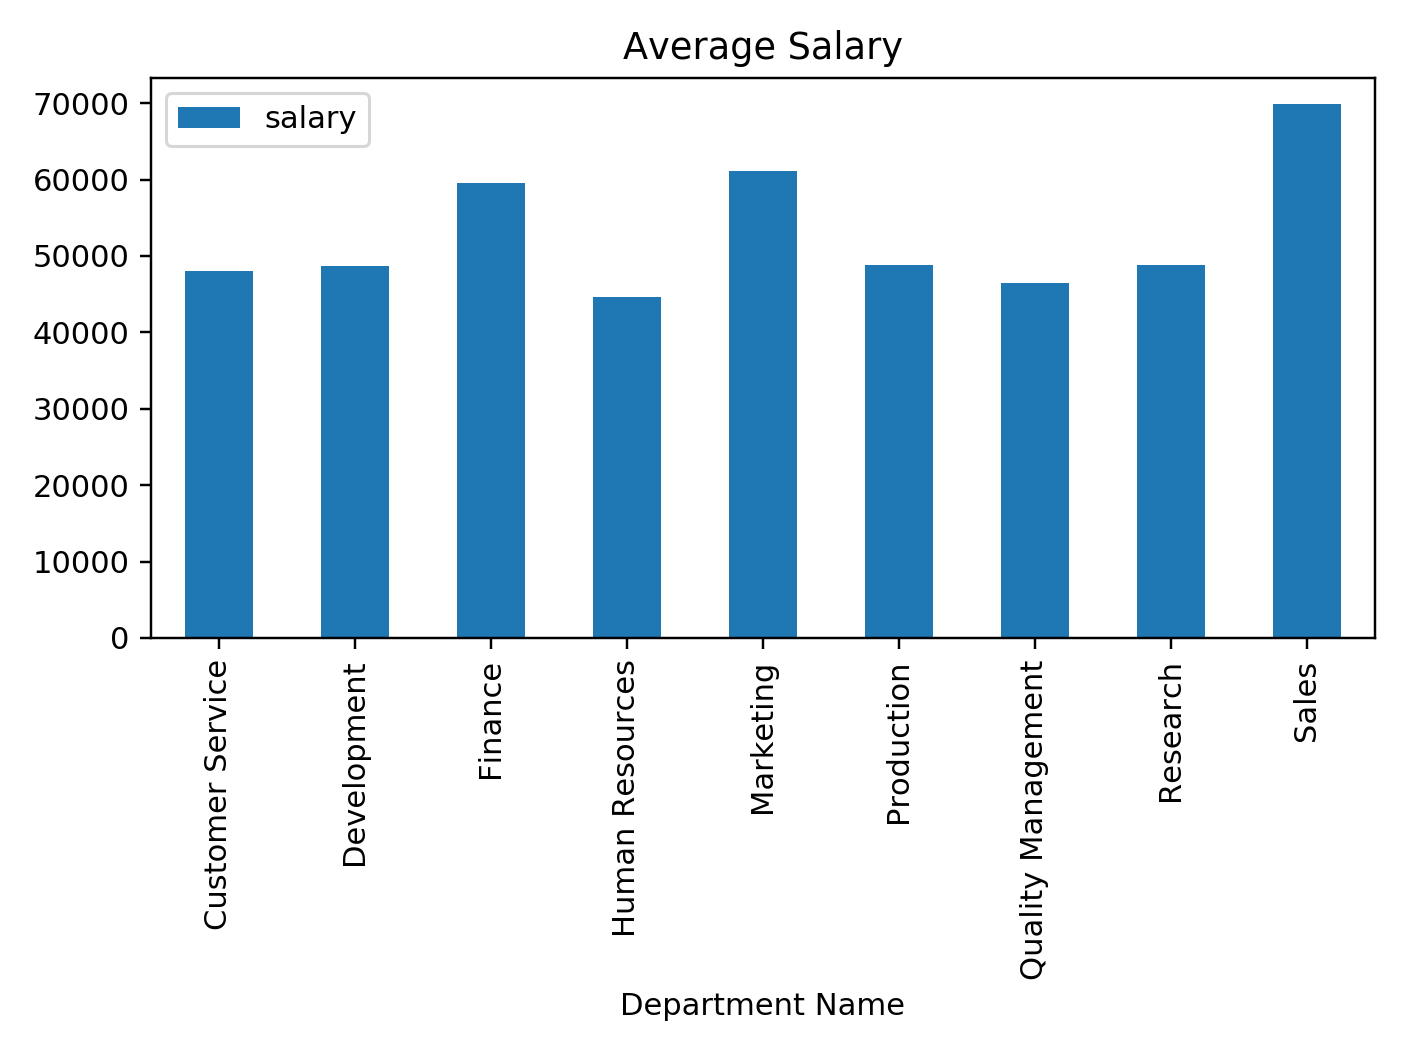

In [36]:
average_salary_df.plot(kind="bar")
plt.title("Average Salary")
plt.xlabel("Department Name")
plt.tight_layout()


In [37]:
plt.savefig('Average_Salary.png')